In [1]:
import pandas as pd 
import numpy as np

In [2]:
train_data = pd.read_csv("D:/Data Science/Data Science/Assignments/17 Support Vector Machines/SalaryData_Train.csv")

In [3]:
train_data.head(4)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
train_data.shape

(30161, 14)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

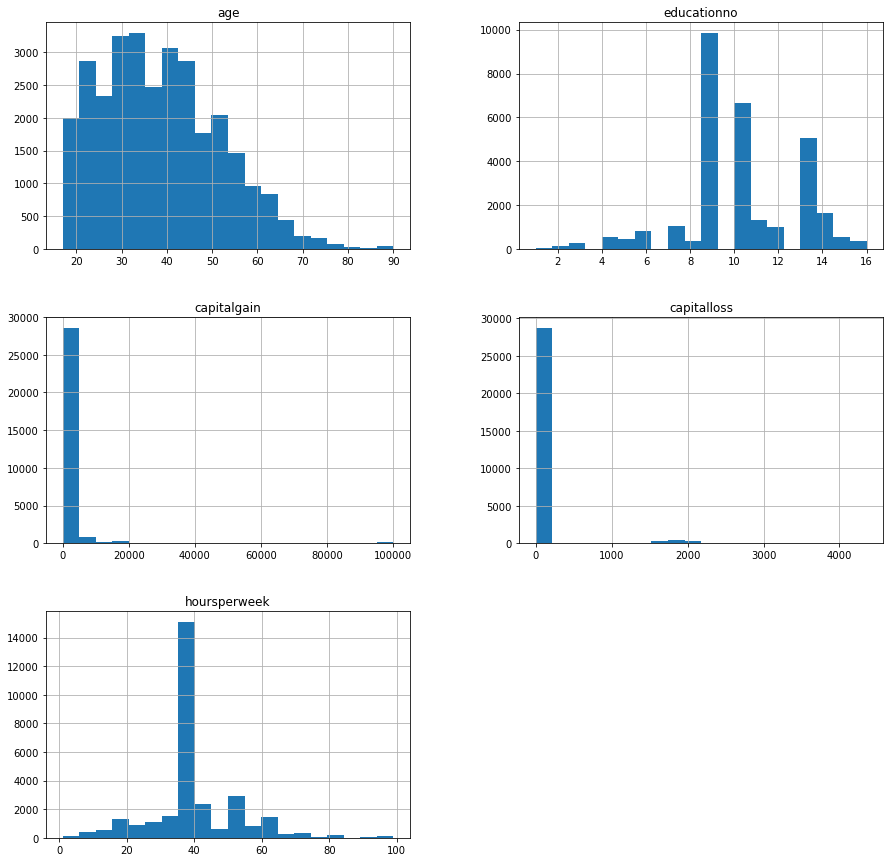

In [6]:
train_data.hist(figsize=(15,15), bins=20)

In [7]:
import seaborn as sns

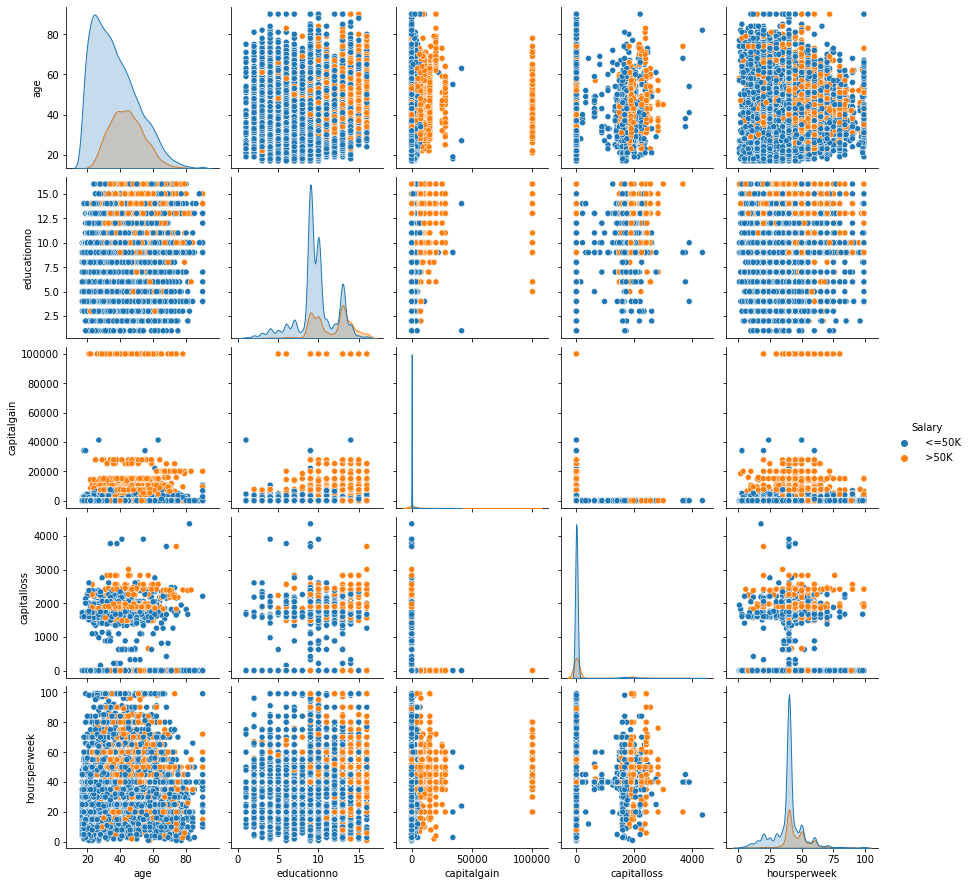

In [8]:
sns.pairplot(train_data,hue='Salary')

In [14]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test_data = pd.read_csv("D:/Data Science/Data Science/Assignments/17 Support Vector Machines/SalaryData_Test.csv")

In [10]:
test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
test_data.shape

(15060, 14)

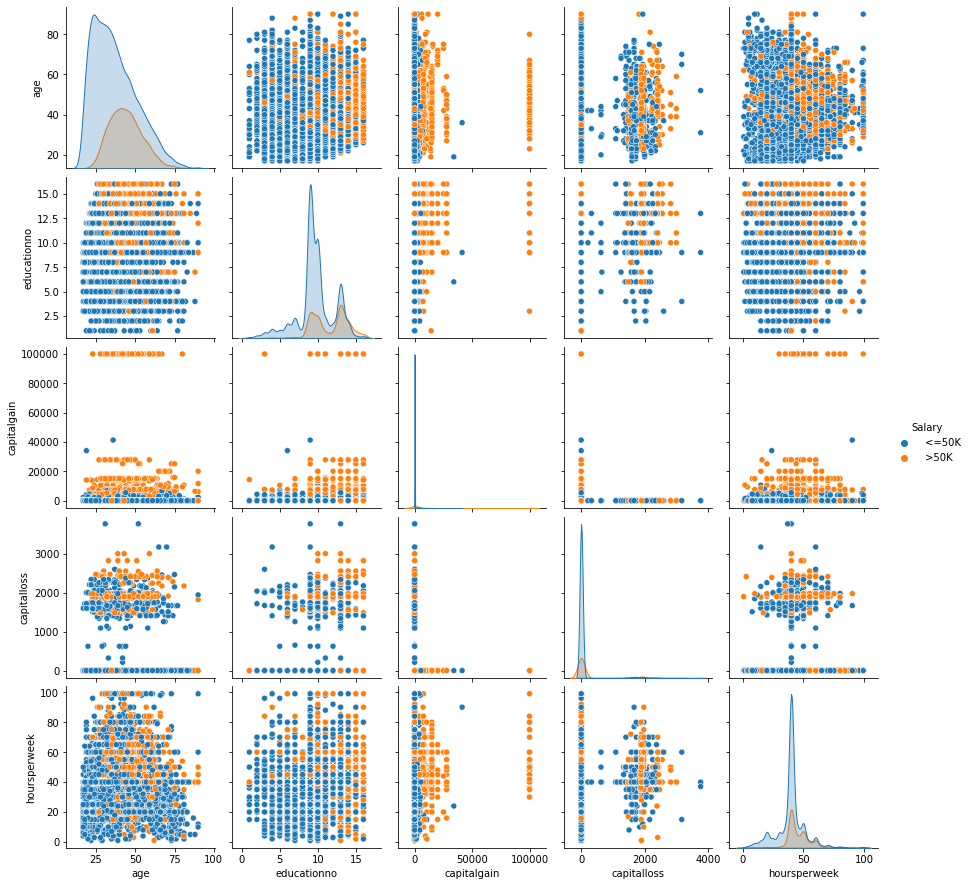

In [13]:
sns.pairplot(test_data,hue='Salary')

In [14]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
#categorical columns
columns_names=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [16]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in columns_names:
    train_data[i] = number.fit_transform(train_data[i])
    test_data[i] = number.fit_transform(test_data[i])

colnames = train_data.columns

In [17]:
test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1


In [18]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [19]:
def norm_func(i):
    x = ( i - i.min()) / ( i.max() - i.min())
    return(x)

In [20]:
norm_data_train = norm_func(train_data.iloc[:,:])
norm_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564,0.0


In [21]:
norm_data_test = norm_func(test_data.iloc[:,:])
norm_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718,0.0


In [22]:
#Box plot

<AxesSubplot:>

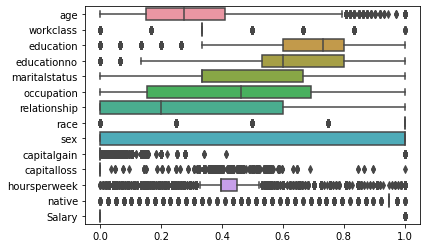

In [23]:
sns.boxplot(data=norm_data_train,orient="h")

<AxesSubplot:>

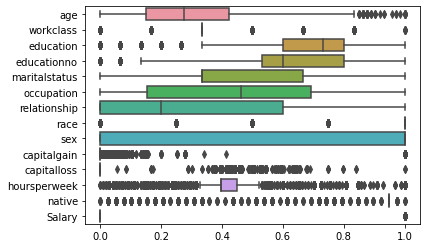

In [24]:
sns.boxplot(data=norm_data_test,orient="h")

In [25]:
norm_data_train.Salary.value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

In [26]:
norm_data_test.Salary.value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

In [27]:
#Since there is huge change in the values the dataset suffers from class imbalance problem

In [28]:
# class count
class_count_0, class_count_1 = norm_data_train.Salary.value_counts()

In [29]:
print(class_count_0,class_count_1)

22653 7508


In [30]:
data_majority_train = norm_data_train[norm_data_train.Salary == 0.0]
data_minority_train = norm_data_train[norm_data_train.Salary == 1.0]

In [31]:
train_major_count = class_count_0

In [32]:
train_minor_count = class_count_1

In [33]:
# class count
class_count_0, class_count_1 = norm_data_test.Salary.value_counts()
print(class_count_0,class_count_1)

11360 3700


In [34]:
test_major_count = class_count_0
test_minor_count = class_count_1

In [35]:
data_majority_test = norm_data_test[norm_data_test.Salary == 0.0]
data_minority_test = norm_data_test[norm_data_test.Salary == 1.0]

In [36]:
 #down sampling Train dataset

In [37]:
from sklearn.utils import resample

In [38]:
#Train data set

In [39]:
majority_downsamp_train = resample(data_majority_train, replace=False,
                                   n_samples=8000, random_state=123)

print(majority_downsamp_train.shape)


(8000, 14)


In [40]:
data_down_sample_train = pd.concat([majority_downsamp_train,data_minority_train])

In [41]:
print (data_down_sample_train.Salary.value_counts())

0.0    8000
1.0    7508
Name: Salary, dtype: int64


In [42]:
#down sampling test dataset

In [43]:
majority_downsamp_test = resample(data_majority_test, replace=False,
                                   n_samples=4000, random_state=125)

In [44]:
print (majority_downsamp_test.shape)

(4000, 14)


In [45]:
data_down_sample_test = pd.concat([majority_downsamp_test,data_minority_test])
print (data_down_sample_test.Salary.value_counts())

0.0    4000
1.0    3700
Name: Salary, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [47]:
XTr = data_down_sample_train.drop(['Salary'],axis=1) 
YTr = data_down_sample_train['Salary']

In [48]:
XTe = data_down_sample_test.drop(['Salary'],axis=1) 
YTe= data_down_sample_test['Salary']

In [49]:
#SVM

In [50]:
from sklearn.svm import SVC

In [51]:
#Linear

In [52]:
clf = SVC(C= 0.1,kernel='linear')
clf.fit(XTr , YTr)

SVC(C=0.1, kernel='linear')

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 75.6103896103896


array([[2932, 1068],
       [ 810, 2890]], dtype=int64)

In [54]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [55]:
#Poly

In [56]:
clf = SVC(C= 0.1,kernel='poly')
clf.fit(XTr , YTr)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 80.94805194805194


array([[3043,  957],
       [ 510, 3190]], dtype=int64)

In [57]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [58]:
#rbf

In [59]:
clf = SVC(C= 0.1,kernel='rbf')
clf.fit(XTr , YTr)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 79.38961038961038


array([[2911, 1089],
       [ 498, 3202]], dtype=int64)

In [60]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [61]:
#Using oversampling technique SMOTE 

In [62]:
XTrain = norm_data_train.iloc[:,0:13]
YTrain = norm_data_train['Salary']

In [63]:
XTest = norm_data_test.iloc[:,0:13]
YTest = norm_data_test['Salary']

In [66]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


In [67]:

from imblearn.over_sampling import RandomOverSampler, SMOTE

In [68]:
smote = SMOTE(random_state=0)
X_smote_train, Y_smote_train = smote.fit_resample(XTrain, YTrain)
pd.Series(Y_smote_train).value_counts()

1.0    22653
0.0    22653
Name: Salary, dtype: int64

In [69]:
print (pd.Series(Y_smote_train).value_counts())
XTrain = X_smote_train
YTrain = Y_smote_train

1.0    22653
0.0    22653
Name: Salary, dtype: int64


In [70]:
X_smote_test, Y_smote_test = smote.fit_resample(XTest, YTest)
pd.Series(Y_smote_test).value_counts()

1.0    11360
0.0    11360
Name: Salary, dtype: int64

In [71]:
print (pd.Series(Y_smote_test).value_counts())
XTest = X_smote_test
YTest = Y_smote_test

1.0    11360
0.0    11360
Name: Salary, dtype: int64


In [72]:
#Linear

In [73]:
clf = SVC(C= 0.1,kernel='linear')
clf.fit(XTrain , YTrain)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 75.95950704225352


array([[8270, 3090],
       [2372, 8988]], dtype=int64)

In [74]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [75]:
#Poly

In [76]:
clf = SVC(C= 0.1,kernel='poly')
clf.fit(XTrain , YTrain)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 81.46126760563381


array([[8624, 2736],
       [1476, 9884]], dtype=int64)

In [77]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [78]:
#rbf

In [79]:
clf = SVC(C= 0.1,kernel='rbf')
clf.fit(XTrain , YTrain)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 80.29489436619718


array([[8350, 3010],
       [1467, 9893]], dtype=int64)

In [80]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])